# 1) Prepare a classification model using SVM for salary data 

Data Description:
age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
salary_train = pd.read_csv("C:\\Excelr Data\\Assignments\\Support Vector Machines\\SalaryData_Train.csv")
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_test = pd.read_csv("C:\\Excelr Data\\Assignments\\Support Vector Machines\\SalaryData_Test.csv")
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]


In [6]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()

In [7]:
for i in string_columns:
    salary_train[i] = number.fit_transform(salary_train[i])
    salary_test[i] = number.fit_transform(salary_test[i])
# converting to dummies

In [8]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [9]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [10]:
colnames = salary_train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [11]:
len(colnames[0:13])


13

In [12]:
trainX = salary_train[colnames[0:13]]# all input variables
#trainX

In [13]:
trainY = salary_train[colnames[13]] # target variable
#trainY

In [14]:
testX  = salary_test[colnames[0:13]]
#testX

In [15]:
testY  = salary_test[colnames[13]]
#testY

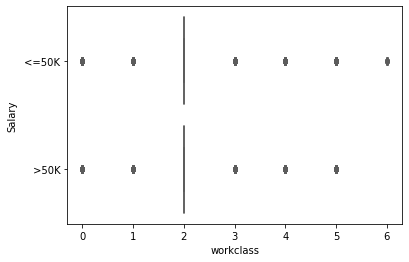

In [16]:
sns.boxplot(x="workclass",y="Salary",data=salary_train,palette = "hls")


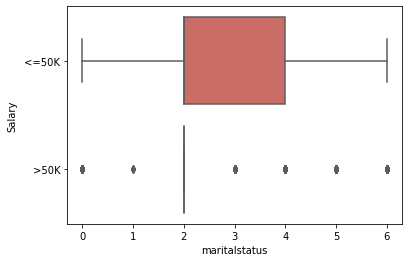

In [17]:
sns.boxplot(x="maritalstatus",y="Salary",data=salary_test,palette = "hls")


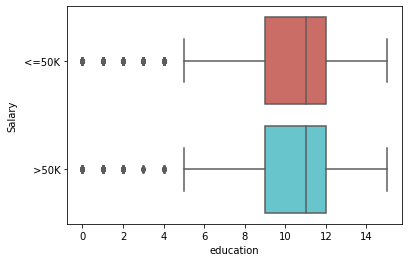

In [18]:
sns.boxplot(x="education",y="Salary",data=salary_train,palette = "hls")


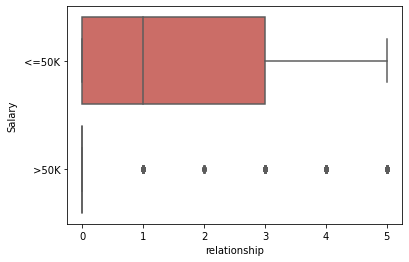

In [19]:
sns.boxplot(x="relationship",y="Salary",data=salary_test,palette = "hls")


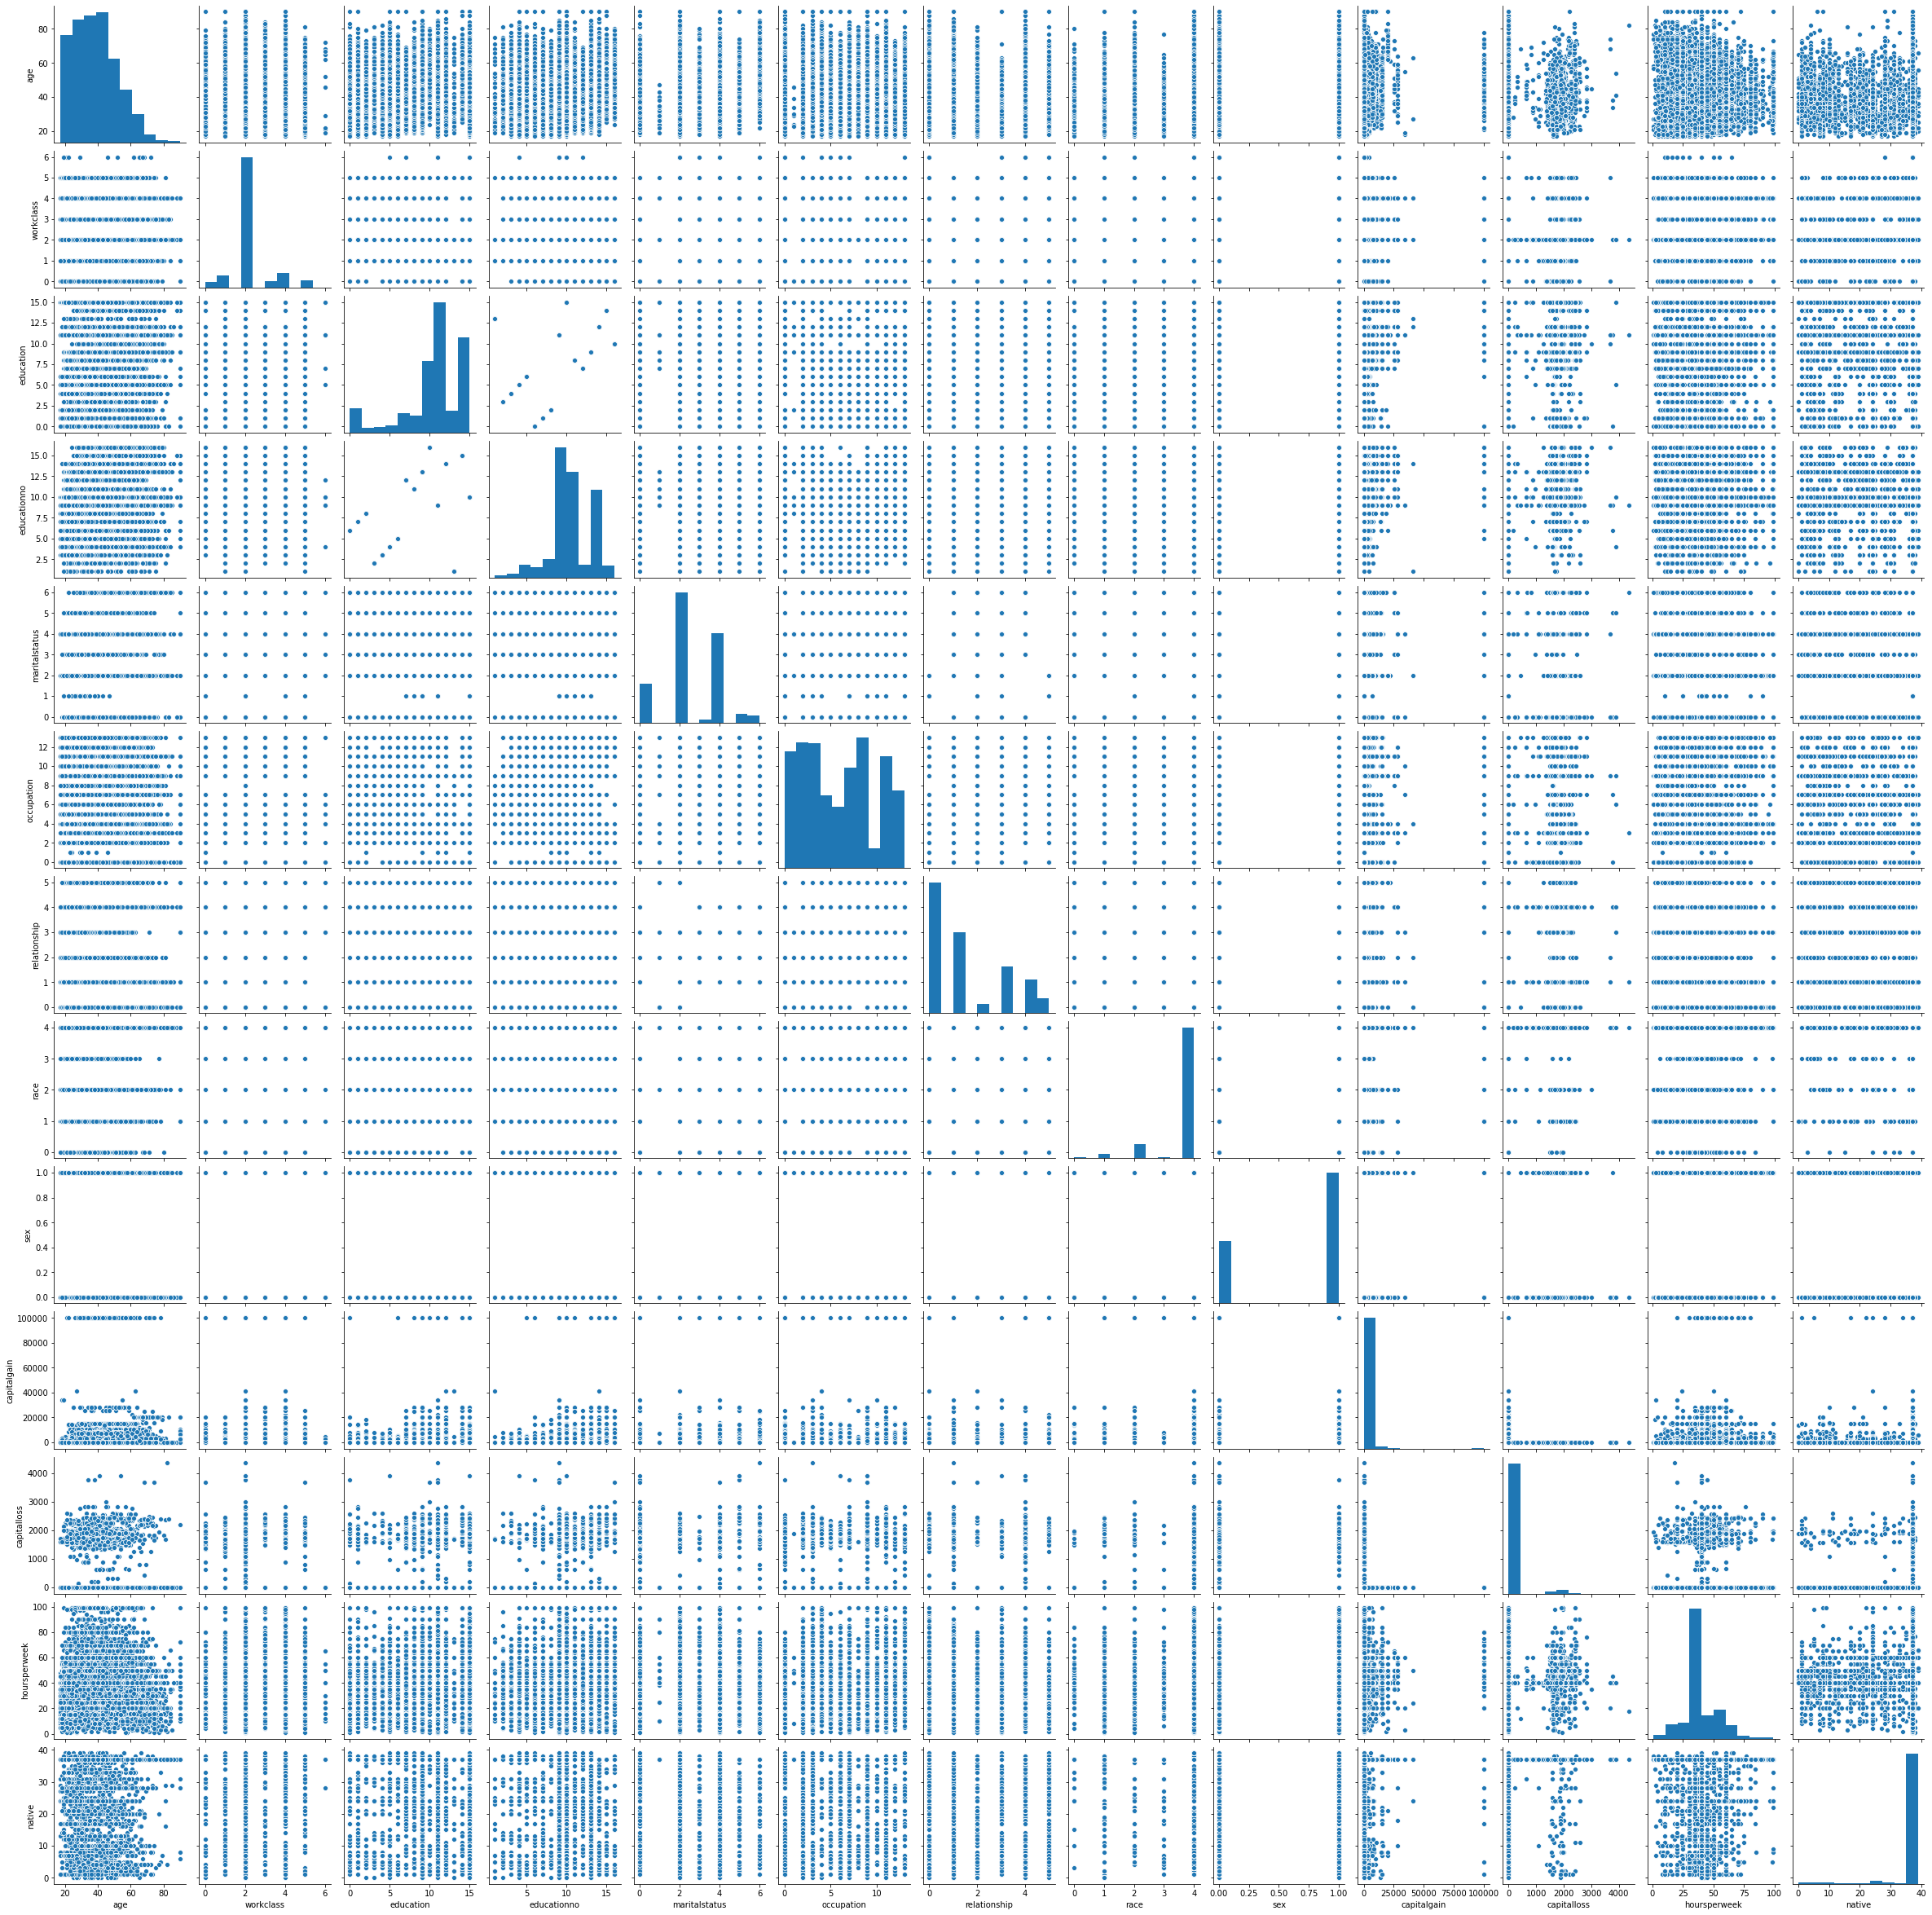

In [20]:
sns.pairplot(data=salary_train)


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [24]:
trainX

array([[ 0.04277892,  2.93594688, -0.34982703, ..., -0.21850808,
        -0.07773541,  0.26635842],
       [ 0.88026081,  1.88764517, -0.34982703, ..., -0.21850808,
        -2.33149486,  0.26635842],
       [-0.0333558 , -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       ...,
       [ 1.48933854, -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       [-1.25151126, -0.20895825,  0.1748048 , ..., -0.21850808,
        -1.74718685,  0.26635842],
       [ 1.03253024,  0.83934346,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842]])

In [25]:
testY

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [26]:
trainY.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [27]:
trainY.replace({" <=50K": 0," >50K" : 1},inplace=True)

In [28]:
trainY

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [29]:
testY.replace({" <=50K": 0 , " >50K" : 1},inplace = True)

In [29]:
testY

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [31]:
trainY.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE


In [33]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(trainX,np.array( trainY).ravel())

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

## Create SVM classification object 

# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

# kernel = linear


In [35]:
#help(SVC)
model_linear = SVC(kernel = "linear")
model_linear

SVC(kernel='linear')

In [36]:
model_linear.fit(X_train_res, y_train_res)

SVC(kernel='linear')

In [37]:
pred_test_linear = model_linear.predict(testX)
pred_test_linear

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
np.mean(pred_test_linear==testY)

0.7520584329349269

## Kernel = poly

In [39]:
model_poly = SVC(kernel = "poly")
model_poly

SVC(kernel='poly')

In [40]:
model_poly.fit(trainX,trainY)


SVC(kernel='poly')

In [41]:
pred_test_poly = model_poly.predict(testX)
pred_test_poly

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [42]:
np.mean(pred_test_poly==testY) 


0.8409030544488711

### kernel = rbf

In [43]:
model_rbf = SVC(kernel = "rbf")
model_rbf

SVC()

In [44]:
model_rbf.fit(trainX,trainY)


SVC()

In [45]:
pred_test_rbf = model_rbf.predict(testX)
pred_test_rbf 

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [46]:
np.mean(pred_test_rbf==testY) 


0.845883134130146